# STATISTICS & MACHINE LEARNING

## Comparing kernel ridge regression and regular ridge regression

## Question 1:
## Find a dataset and implement kernel ridge regression and compare to regular ridge regression

*** For this question we have taken Salary_Data as our dataset which contains the data about Salaries of individual depending upon the years of expertise. ***

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/Users/kshit/Desktop/ML&stats/Salary_Data_KS.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

*** We have split the data as Training data and Test data for fitting of the models. ***

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## 1) Regular Ridge Regression  ###

*** Ridge regression is like least squares but shrinks the estimated coefficients towards zero.***

In [61]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [62]:
# Predicting the Test set results
y_pred = ridge.predict(X_test)
y_pred

array([  42442.82295347,  121395.51648567,   65769.75513344,
         63975.37573498,  114217.99889184,  107040.481298  ,
        115115.18859106,   64872.56543421])

In [63]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794], dtype=int64)

In [64]:
from sklearn.metrics import explained_variance_score
print("Variance score for Ridge Regression is :",explained_variance_score(y_test,y_pred))

Variance score for Ridge Regression is : 0.981131709618


In [65]:
from sklearn.metrics import r2_score
print('R-squared value :',r2_score(y_test,y_pred))

R-squared value : 0.975229521722


In [66]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3981.7138964554179

## 2) Kernel Ridge Regression ##

In [67]:
from sklearn.kernel_ridge import KernelRidge
kernel_ridge = KernelRidge(alpha=1.0)
kernel_ridge.fit(X_train, y_train)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [68]:
# Predicting the Test set results
y_pred1 = kernel_ridge.predict(X_test)
y_pred1

array([-30504.44977381,  48448.2437584 ,  -7177.51759384,  -8971.8969923 ,
        41270.72616456,  34093.20857073,  42167.91586379,  -8074.70729307])

In [69]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794], dtype=int64)

In [70]:
from sklearn.metrics import explained_variance_score
print("Variance score for Ridge Regression is :",explained_variance_score(y_test,y_pred1))

Variance score for Ridge Regression is : 0.981131709618


In [71]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

-3.9161673653786986

In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred1)

70499.809661940904

## Comparison of Regular ridge and Kernel ridge regression ##
### *** As seen from the R2_score and mean squared error we can conclude that ridge regression best suited the dataset *** ###

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------- ####

## Question 2: 
##  Find a dataset and compare linear, polynomial, and RBF kernels in SVM 
***  Let's get started with our analysis.***

***  We will firstly try and fit model to our dataset***

### Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:/Users/kshit/Desktop/ML&stats/Dataset.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## 1) Kernel type : Linear  ##
###  Linear SVM is the extremely fast machine learning algorithm for solving multiclass classification problems from ultra large data sets that implements an original proprietary version of a cutting plane algorithm for designing a linear support vector machine.

In [85]:
# Fitting classifier to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

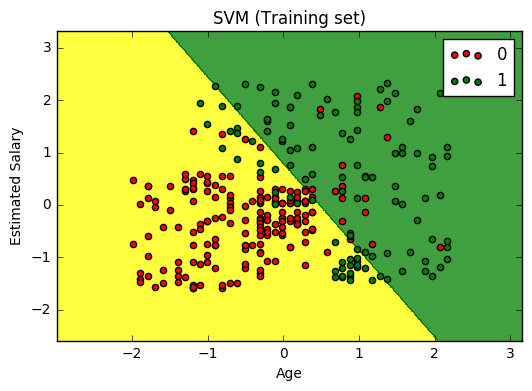

In [88]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

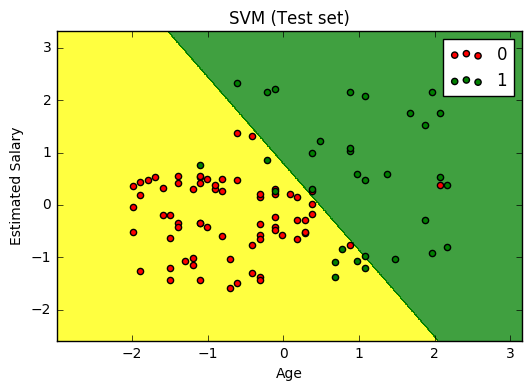

In [89]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 2) Kernel type : Radial Basis Function (RBF) ##

### In machine learning, the (Gaussian) radial basis function kernel, or RBF kernel, is a popular kernel function used in various kernelized learning algorithms. 
__In particular, it is commonly used in support vector machine classification.__

In [90]:
# Fitting classifier to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[64,  4],
       [ 3, 29]])

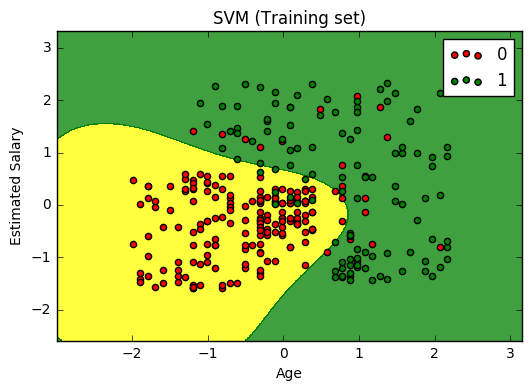

In [94]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

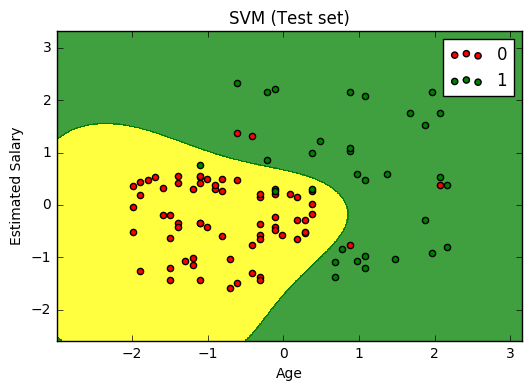

In [95]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## 3) Kernel type : Polynomial with degree 3 ##

### In Machine Learning, the polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.
### In our case, the parameters defined are 'degree'=3 and 'coef0' = 1.5

In [96]:
# Fitting classifier to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel='poly', degree=3, coef0=1.5,random_state=0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.5,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred)
cm3

array([[64,  4],
       [ 3, 29]])

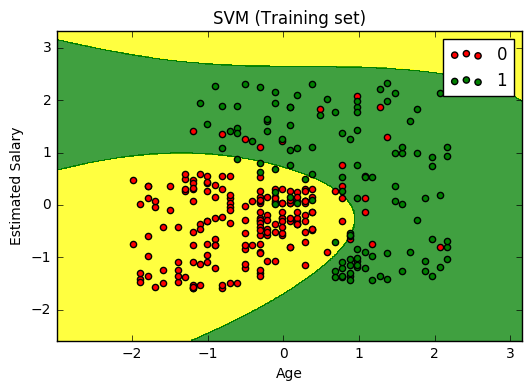

In [99]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


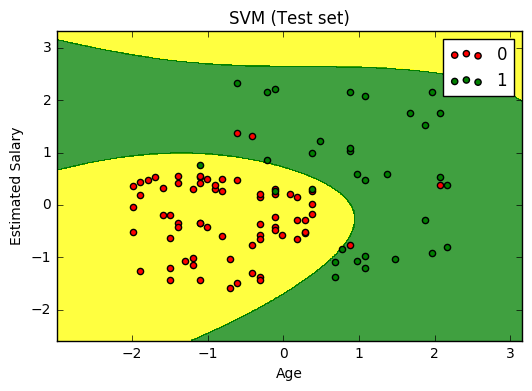

In [100]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## *** Now let's have a look at confusion matrix for all the kernels *** ##

In [54]:
print('Confusion Matrix for Linear SVM\n',cm)

Confusion Matrix for Linear SVM
 [[66  2]
 [ 8 24]]


In [44]:
print('Confusion Matrix for RBF SVM\n',cm2)

Confusion Matrix for RBF SVM
 [[64  4]
 [ 3 29]]


In [56]:
print('Confusion Matrix for Polynomial SVM with degree 3\n',cm3)

Confusion Matrix for Polynomial SVM with degree 3
 [[64  4]
 [ 3 29]]


## Comparison of Linear, RBF and Polynomial SVMs ##
## Conclusions:
***- 1) In case of Linear SVM, there are 10 wrong predictions out of 100 total values which constitutes to approximate 90% accuracy***

***- 2) In case of RBF and Polynomial SVMs, we see that there are 7 wrong predictions out of 100 total test values which makes the accuracy of these classifications approximately around 93%. ***

## References:

1) https://machinelearningmastery.com/support-vector-machines-for-machine-learning/

2) http://scikit-learn.org/stable/modules/kernel_ridge.html

3) https://stackoverflow.com/questions/40358570/kernel-ridge-regression-in-python-for-multiple-features